<a href="https://colab.research.google.com/github/S-EGK/Modern-Control/blob/main/DoublePendulum%20Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'Author: Srikanth Elkoori Ghantala Karnam'
'UCID: M13998009'
'Modern Control Assignment 1'
'Problem 2'

# importing libraries
from math import cos, sin
import numpy as np
from random import random
import scipy.signal as signal
import scipy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.patches import Circle

Text(0.5, 1.0, 'Double Pendulum System')

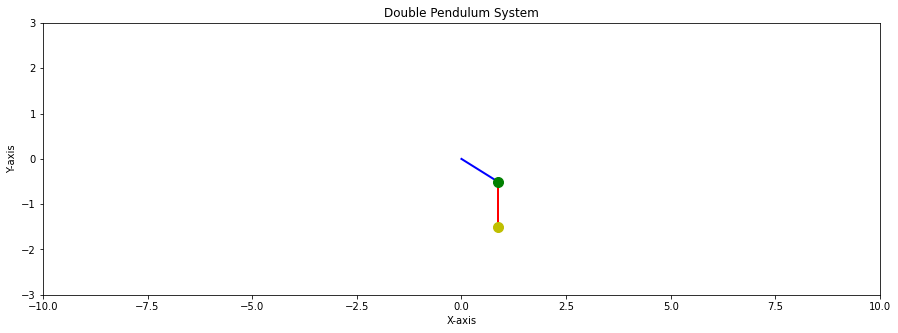

In [ ]:
  # Parameters
  g = 9.81 # gravity
  m1 = 1 # mass of pendulum bob 1
  m2 = 1 # mass of pendulum bob 2
  l1 = 1 # length of pendulum rod 1
  l2 = 1 # length of pendulum rod 2
  r = 0.05 # radius of the bobs

  # initial conditions

  theta1 = np.pi/3
  theta_dot1 = 0
  theta2 = 0
  theta_dot2 = 0
  states = np.array([theta1, theta2, theta_dot1, theta_dot2])

  # simulation parameters

  dt = 0.1
  Tfinal = 40
  Ts = dt
  Tsteps = Tfinal/Ts # number of frames
  frames = int(Tsteps)

  # animation parameters

  rod1_x = [0, l1 * np.sin(theta1)]
  rod1_y = [0, -l1 * np.cos(theta1)]
  rod2_x = [l1  *np.sin(theta1), l1 * np.sin(theta1) + l2*np.sin(theta2)]
  rod2_y = [-l1 * np.cos(theta1), -l1 * np.cos(theta1) - l2*np.cos(theta2)]

  fig = plt.figure(figsize = (15,5))
  ax1 = plt.subplot(1,1,1)
  ax1.set_xlim((-10,10))
  ax1.set_ylim((-3,3))

  rod1, = ax1.plot(rod1_x, rod1_y, 'b', lw = 2)
  rod2, = ax1.plot(rod2_x, rod2_y, 'r', lw = 2)

  bob1, = ax1.plot(l1 * np.sin(theta1), -l1 * np.cos(theta1), 'g', marker = 'o', ms = 10)
  bob2, = ax1.plot(l1 * np.sin(theta1) + l2 * np.sin(theta2), -l1 * np.cos(theta1)-l2 * np.cos(theta2), 'y', marker = 'o', ms = 10)

  ax1.set_xlabel('X-axis')
  ax1.set_ylabel('Y-axis')
  ax1.set_title('Double Pendulum System')

In [ ]:
def rod1Points(l1, theta1):
    rod1_x=[0, l1 * np.sin(theta1)]
    rod1_y=[0, -l1 * np.cos(theta1)]
    
    return [rod1_x, rod1_y]

def bob1Points(l1, theta1):
    bob1_x, bob1_y = l1 * np.sin(theta1), -l1 * np.cos(theta1)

    return [bob1_x, bob1_y]

def bob2Points(l1, l2, theta1, theta2):
    bob2_x, bob2_y = l1 * np.sin(theta1) + l2 * np.sin(theta2), -l1 * np.cos(theta1) - l2 * np.cos(theta2)

    return [bob2_x, bob2_y]

def rod2Points(l1, l2, theta1, theta2):
    rod2_x = [l1 * np.sin(theta1), l1 * np.sin(theta1) + l2 * np.sin(theta2)]
    rod2_y = [-l1 * np.cos(theta1), -l1 * np.cos(theta1) - l2 * np.cos(theta2)]
    
    return [rod2_x, rod2_y] 

In [ ]:
  def dblpend_dyna(t,y):

    theta1 = y[0]
    theta2 = y[1]
    theta_dot1 = y[2]
    theta_dot2 = y[3]

    s1 = np.sin(y[0])
    c1 = np.cos(y[0])
    s2 = np.sin(y[1])
    c2 = np.cos(y[1])

    k = 2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2)

    theta_ddot1 = (- g * (2 * m1 + m2) * s1 - m2 * g * np.sin(theta1 - 2 * theta2) - 2 * np.sin(theta1 - theta2) * m2 * (theta_dot2 ** 2 * l2 + theta_dot1 ** 2 * l1 * np.cos(theta1 - theta2))) / l1 * k
    theta_ddot2 = (2 * np.sin(theta1 - theta2) * (theta_dot1 ** 2 * l1 * (m1 + m2) + g * (m1 + m2) * c1 + theta_dot2 ** 2 * l2 * m2 * np.cos(theta1 - theta2))) / l2 * k

    return [y[2], y[3], theta_ddot1, theta_ddot2]

In [ ]:
def step(states, dt):
  theta1 = states[0]
  theta2 = states[1]
  theta_dot1 = states[2]
  theta_dot2 = states[3]

  sol = solve_ivp(lambda t, y: dblpend_dyna(t, y), [0, dt], [theta1, theta2, theta_dot1, theta_dot2], t_eval = np.linspace(0, dt, 10))
  states = sol.y[:,-1].T
  return states

In [ ]:
def drawframe(i):
  global states
  states = step(states, dt)
  theta1 = states[0]
  theta2 = states[1]
  theta_dot1 = states[2]
  theta_dot2 = states[3]
  rod1_x, rod1_y = rod1Points(l1, theta1)
  bob1_x, bob1_y = bob1Points(l1, theta1)
  rod2_x, rod2_y = rod2Points(l1, l2, theta1, theta2)
  bob2_x, bob2_y = bob2Points(l1, l2, theta1, theta2)
  rod1.set_data(rod1_x, rod1_y)
  rod2.set_data(rod2_x, rod2_y)
  bob1.set_data(bob1_x, bob1_y)
  bob2.set_data(bob2_x, bob2_y)

  return rod1, rod2, bob1, bob2

In [ ]:
from matplotlib import animation
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_title('Double Pendulum System')

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=frames, interval=40, blit=True)

In [ ]:
from IPython.display import HTML
HTML(anim.to_html5_video())

# Note: the animation takes 40mins, please run at your own risk

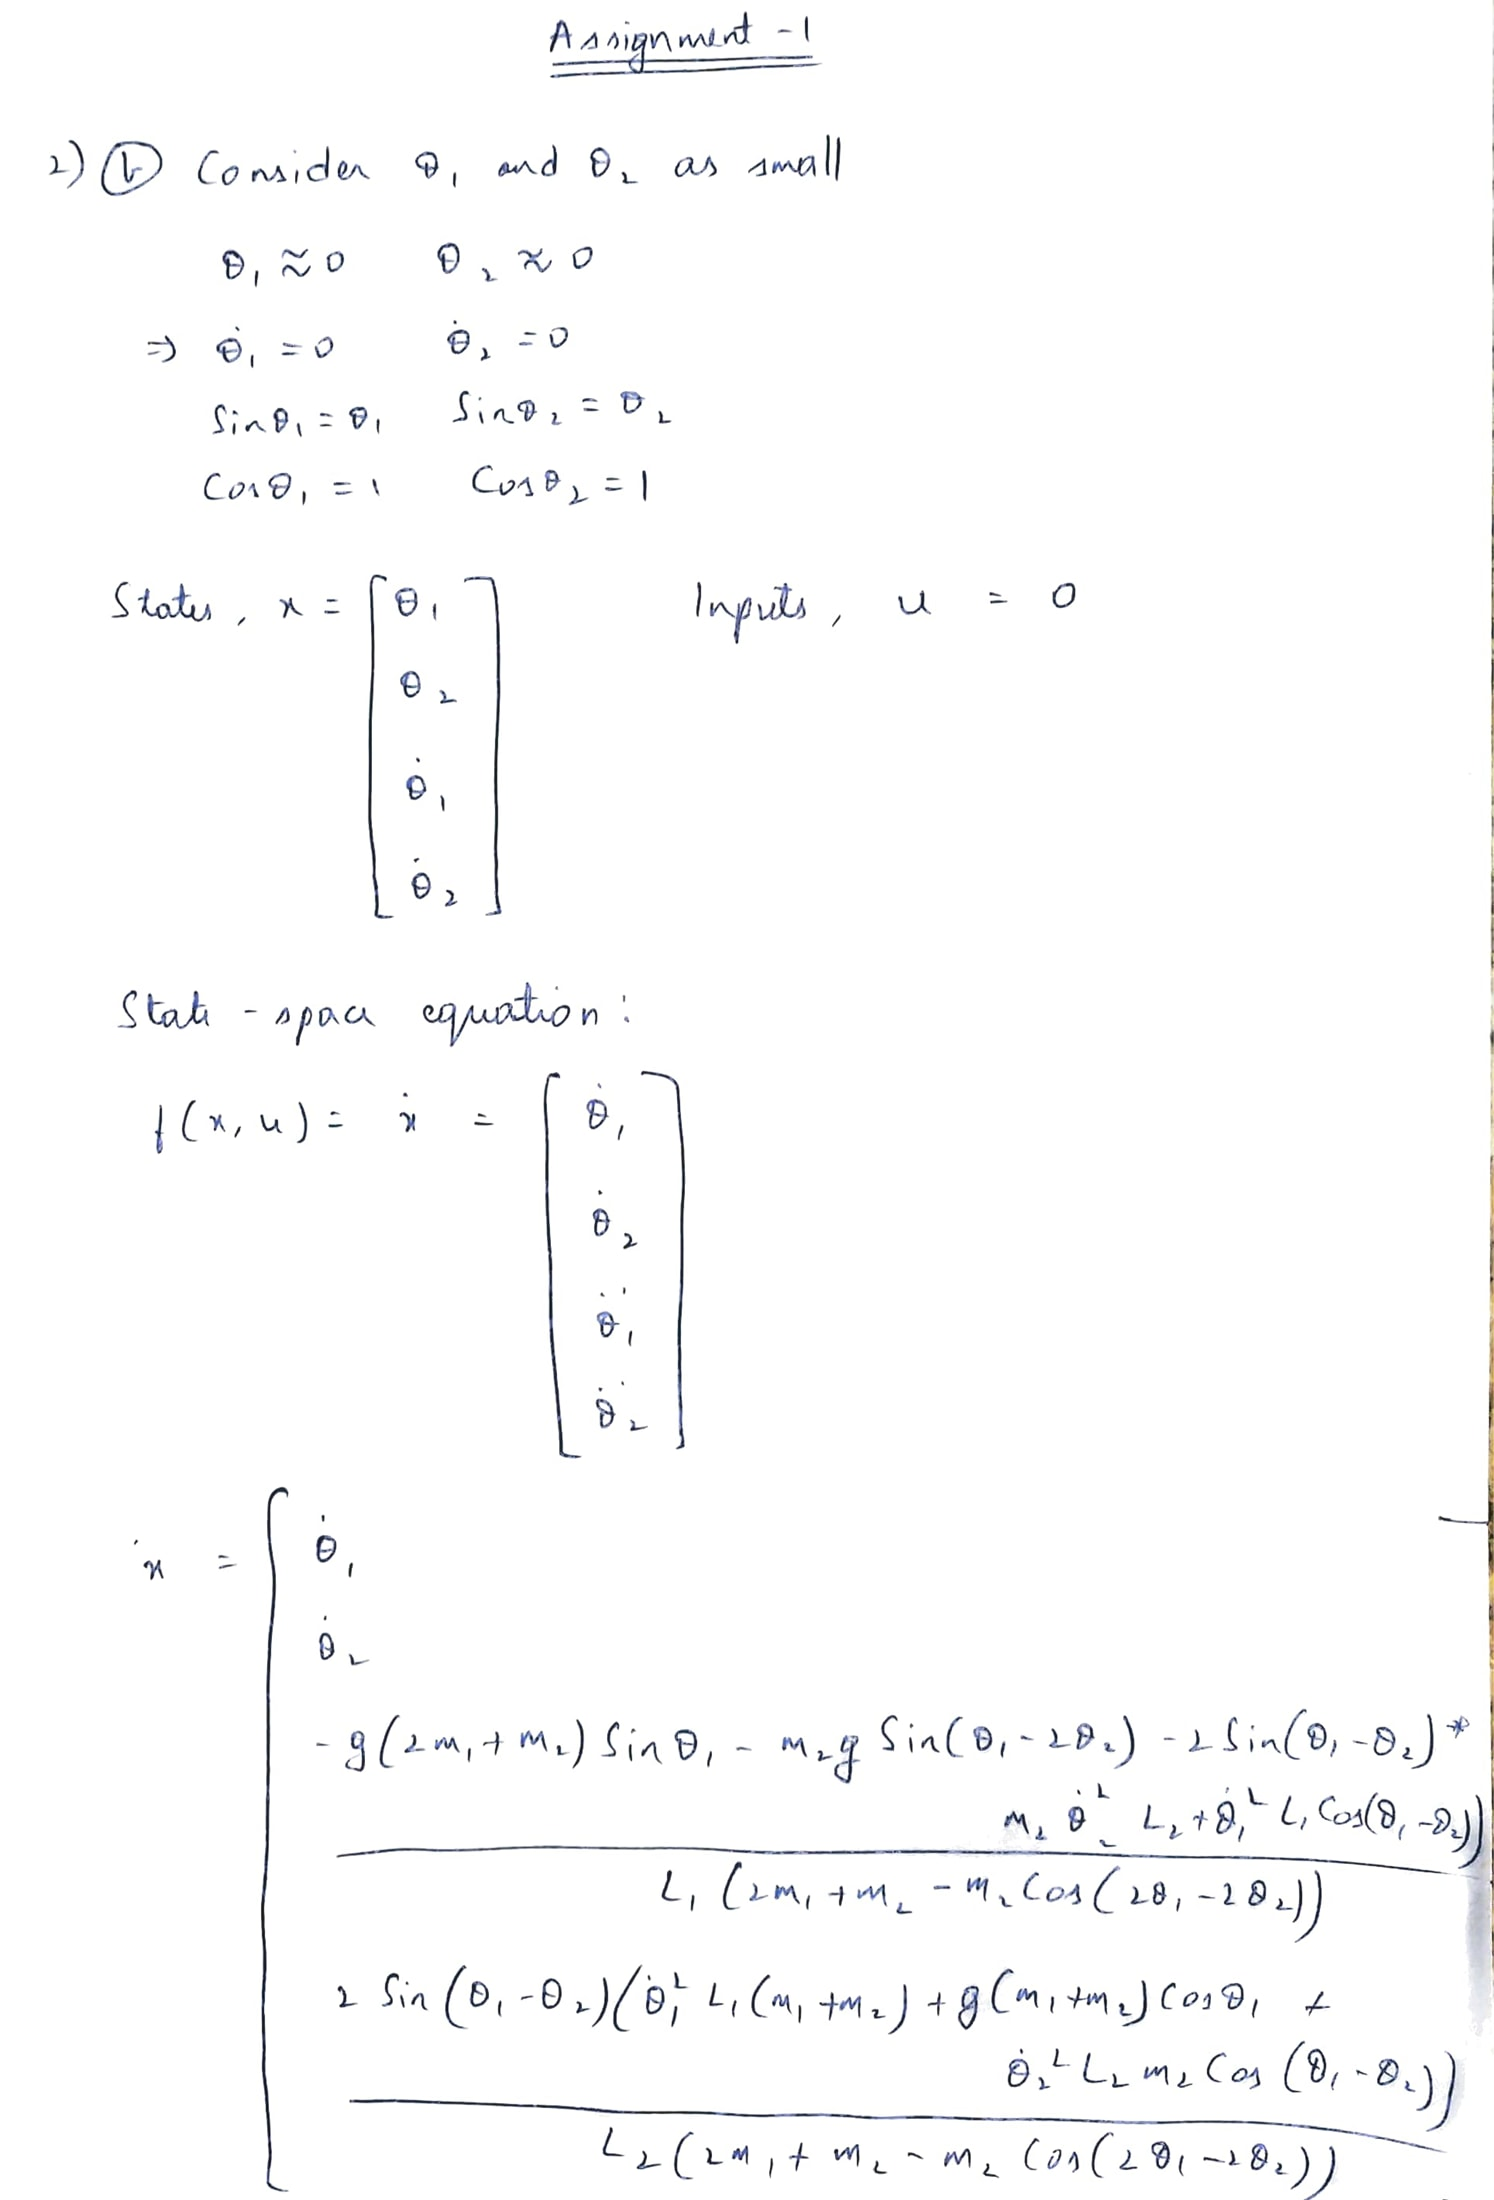

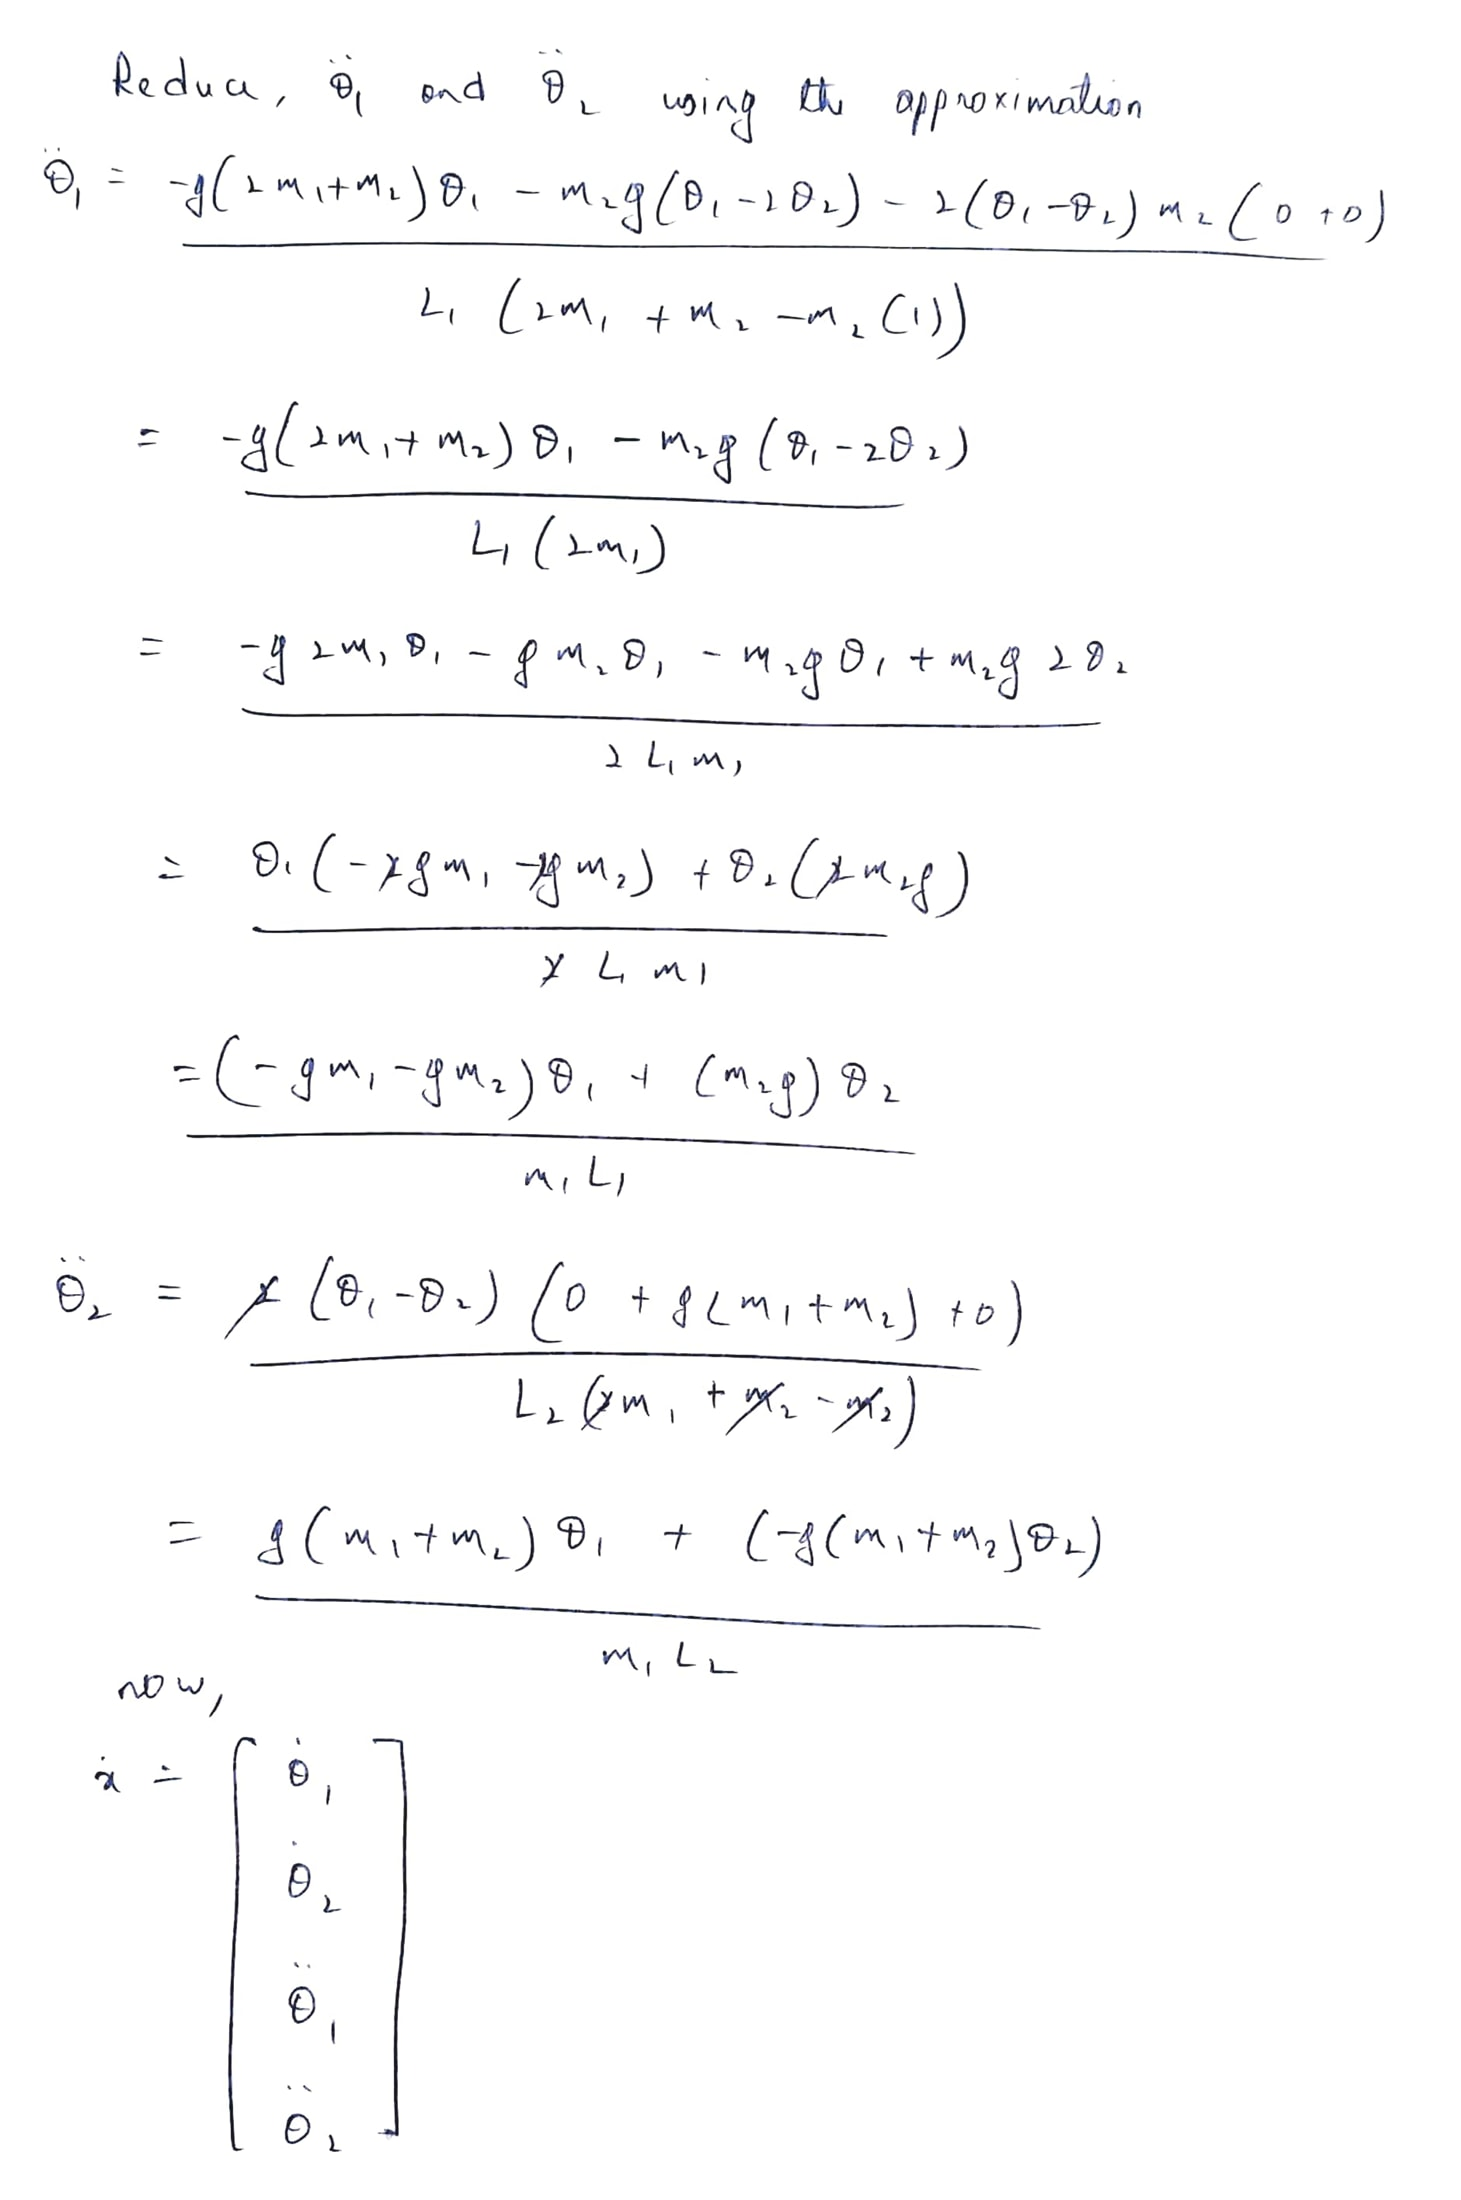

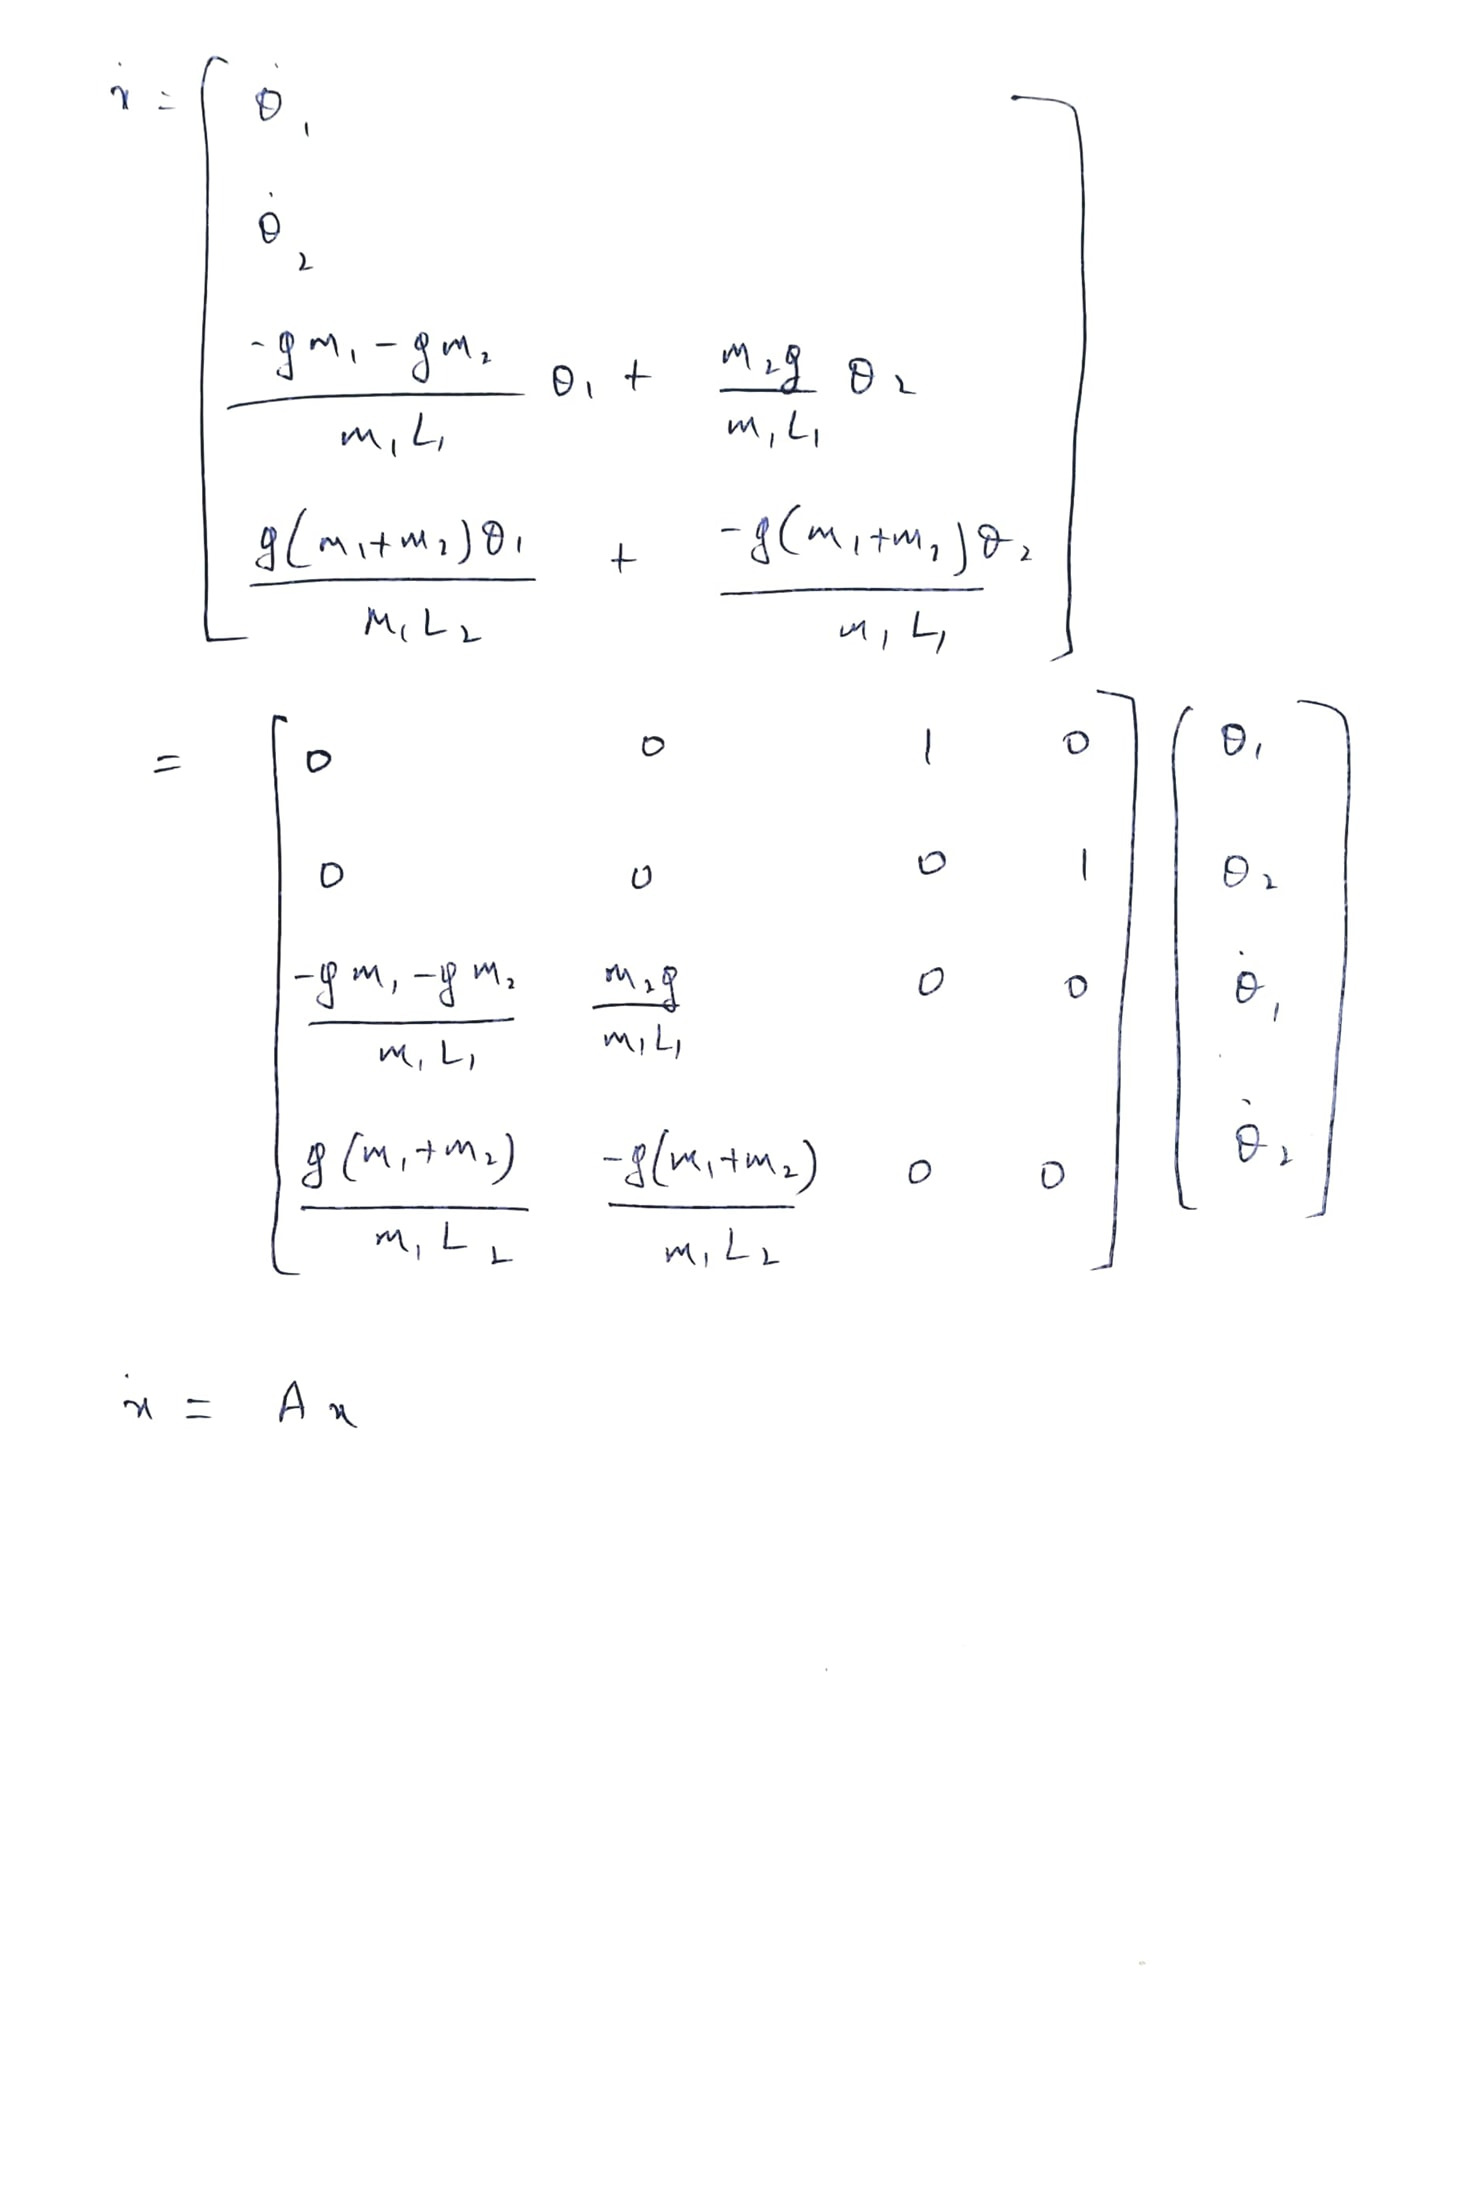